<div class="markdown-google-sans">

# **Fine Tuning Wav2Vec2 Large XLSR 53 for Pronunciation Evaluation 🤗**

Fine Tuning Wav2Vec2 Large XLSR 53 for Pronunciation Evaluation with Speechocean762 Dataset Sentence Level Scoring.

</div>


<div class="markdown-google-sans">

## **Information 😲**
</div>

**Title:** Fine Tuning Wav2Vec2 Large XLSR 53 for Pronunciation Evaluation<br>
**Description:** Fine Tuning Wav2Vec2 Large XLSR 53 for Pronunciation Evaluation with Speechocean762 Dataset Sentence Level Scoring<br>
**Code Writer:** Hafid Ikhsan Arifin<br>
**Date created:** 2023/07/09<br>
**Last modified:** 2023/07/18 (10:40 PM)<br> <!-- Edit Here -->
**Version:** 5.3.0<br> <!-- Edit Here -->
**Testing Type:** Epochs<br> <!-- Edit Here -->

**Testing information:**

<!-- Edit Here -->
| Version | Epochs | Loss | Accuracy | F1 Score | Precision | Recall | Used | Best |
|---------| ---------------------- | ---- | -------- | -------- | --------- | ------ | ---- | ---- |
| 1       | 3  | 1.057 | 0.734 | 0.731 | 0.737 | 0.734 |    |    |
| 2       | 5  |  |  |  |  |  |    |    |
| 3       | 8  | 1.132 | 0.824 | 0.822 | 0.823 | 0.824 |  ✅  |    |
| 4       | 10 | 1.431 | 0.794 | 0.795 | 0.797 | 0.794 |    |  ✅  |

**Hyperparameter information:**

```bash
DATA_TYPE = Oversampling Augmented
TEST_SIZE = 0.2
VAL_SIZE = 0.5
LEARNING_RATE = 1e-4
BATCH_SIZE = 4
```

**Notebook:**<br>
Best Version: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/16__Nu-aC-nuXXArbDtltKD21bfYUdU2I?usp=sharing)<br>
Full Version: [![GitHub watchers](https://img.shields.io/github/watchers/Naereen/StrapDown.js.svg?style=social&label=Watch&maxAge=2592000)](https://github.com/IELTSSpeakingApplication/MachineLearning)

**Model:**<br>
[![Open in Spaces](https://huggingface.co/datasets/huggingface/badges/raw/main/open-in-hf-spaces-sm.svg)](https://huggingface.co/hafidikhsan)

<div class="markdown-google-sans">

## **Introduction 🤔**
</div>

![Audio Classification](https://storage.googleapis.com/ielts-capstone/image/Audio%20Classification%20High.png)

Audio classification is one type of activity which can determine the class label output from the audio data. This task requires audio data as input and will output class labels from the input data obtained. This task is usually used in such as identifying speaker intent, language classification, and even animal species based on their voice. Currently activities or tasks are made easier by a machine.

Currently, sound processing that is quite popular using machines is the Deep Learning [Wav2Vec2 Transformers](https://huggingface.co/docs/transformers/model_doc/wav2vec2) model. [Wav2Vec2](https://huggingface.co/docs/transformers/model_doc/wav2vec2) is a pretrained model for Automatic Speech Recognition (ASR) and was released in [September 2020](https://ai.facebook.com/blog/wav2vec-20-learning-the-structure-of-speech-from-raw-audio/) by Alexei Baevski, Michael Auli, and Alex Conneau. Soon after the superior performance of Wav2Vec2 was demonstrated on the English ASR dataset LibriSpeech, *Facebook AI* presented XLSR-Wav2Vec2 (click [here](https://arxiv.org/abs/2006.13979)). XLSR stands for *cross-lingual  speech representations* and refers to XLSR-Wav2Vec2`s ability to learn speech representations that are useful across multiple languages.

Similar to Wav2Vec2, XLSR-Wav2Vec2 learns powerful speech representations from hundreds of thousands of hours of speech in more than 50 languages of unlabeled speech. Similar, to [BERT's masked language modeling](http://jalammar.github.io/illustrated-bert/), the model learns contextualized speech representations by randomly masking feature vectors before passing them to a transformer network.

The authors show for the first time that massively pretraining an ASR model on cross-lingual unlabeled speech data, followed by language-specific fine-tuning on very little labeled data achieves state-of-the-art results. See Table 1-5 of the official [paper](https://arxiv.org/pdf/2006.13979.pdf).

During fine-tuning week hosted by HuggingFace, more than 300 people participated in tuning XLSR-Wav2Vec2's pretrained on low-resources ASR dataset for more than 50 languages. XLSR-Wav2Vec2 model is fine-tuned using [Connectionist Temporal Classification](https://distill.pub/2017/ctc/) (CTC), an algorithm used to train neural networks for sequence-to-sequence problems and mainly in Automatic Speech Recognition and handwriting recognition.

XLSR-Wav2Vec2 model was shown significant results in many low-resources languages. Here is the [competition board](https://paperswithcode.com/dataset/common-voice) or even testing the models from the [HuggingFace hub](https://huggingface.co/models?filter=xlsr-fine-tuning-week).

![wav2vec2_structure](https://raw.githubusercontent.com/patrickvonplaten/scientific_images/master/xlsr_wav2vec2.png)

In this notebook, I will shows how to fine tune [Wav2Vec2-Large-XLSR-53](https://huggingface.co/jonatasgrosman/wav2vec2-large-xlsr-53-english) pretrained speech models for audio classification. We will do audio classification using [Wav2Vec2-Large-XLSR-53-English](https://huggingface.co/jonatasgrosman/wav2vec2-large-xlsr-53-english) pretrained model and [Speechocean762](https://github.com/jimbozhang/speechocean762) Dataset.

[Speechocean762](https://github.com/jimbozhang/speechocean762) is a non-native English corpus for pronunciation scoring task. This corpus consists of 5000 English sentences. All the speakers are non-native, and their mother tongue is Mandarin. Half of the speakers are Children, and the others are adults. The pronunciation quality scores might be given at phoneme-level, word-level, and sentence-level for a typical pronunciation scoring task. Five experts made the scores. For this task, I use sentence-level for pronunciation quality scores. To avoid subjective bias, each expert scores independently under the same metric. In sentence-level pronunciation quality scores, the score is divided into 5 assessments accuracy, fluency, completeness, prosodic, and total. In this task, I will use total feature. In total feature, score range is from 0 to 10. But because the data obtained there are several class labels that are empty, so to make classification easier, I will divide them into 4 classes from range:

*   9-10 (Proficient)
*   7-8 (Advanced)
*   5-6 (Intermediate)
*   0-4 (Beginner)

Original dataset is available from [Github](https://github.com/jimbozhang/speechocean762) or [Hugging Face Hub Datasets](https://huggingface.co/datasets/jbpark0614/speechocean762). In this task I will use a dataset that I have been created in this [notebook](https://colab.research.google.com/drive/1ThwDqtAciWo19mZhMZ-XkBMGZZrdSptE?usp=sharing). The dataset that I use consists of several columns like:

*   `total_score`
*   `text`
*   `audio`
*   `label`
*   `duration`

For my task, I use `audio` and `label` columns to fine tune model. The dataset is available in my Hugging Face Hub profile [hafidikhsan](https://huggingface.co/hafidikhsan). The dataset is split into 3 dataset for training, validation, and testing.

Thanks to [Jonatas Grosman](https://huggingface.co/jonatasgrosman) who have provided XLSR-Wav2Vec2 pretrained speech models checkpoint from [facebook/wav2vec2-large-xlsr-53](https://huggingface.co/facebook/wav2vec2-large-xlsr-53) pretrain model. I use [Wav2Vec2-Large-XLSR-53-English](https://huggingface.co/jonatasgrosman/wav2vec2-large-xlsr-53-english) pretrained speech models from [Jonatas Grosman](https://huggingface.co/jonatasgrosman). And this model is fine-tuned using [Connectionist Temporal Classification](https://distill.pub/2017/ctc/) (CTC), an algorithm used to train neural networks for sequence-to-sequence problems and mainly in Automatic Speech Recognition and handwriting recognition. Following are the configuration details of the XLSR-Wav2Vec2 model.

```bash
OUTPUT_DIR = "wav2vec2-large-xlsr-53-english-pronunciation-evaluation-ep-v3"
MAX_DURATION = 10
TEST_SIZE = 0.2
VAL_SIZE = 0.5
LEARNING_RATE = 1e-4
BATCH_SIZE = 4
NUM_EPOCHS = 8
EVALUATION_STRATEGY = "epoch"
SAVE_STRATEGY = "epoch"
WARMUP_RATIO = 0.1
LOGGING_STEPS = 10
LOAD_BEST_MODEL_AT_END = True
METRIC_FOR_BEST_MODEL = "accuracy"
PUSH_TO_HUB = False
GRADIENT_ACCUMULATION_STEPS = 1
```

To evaluate the model, I decided to use Loss, Accuracy, F1 Score, Precision, and Recall from Hugging Face [Evaluate](https://huggingface.co/docs/evaluate/index) library.

In this notebook there are several sections to fine tune [Wav2Vec2-Large-XLSR-53-English](https://huggingface.co/jonatasgrosman/wav2vec2-large-xlsr-53-english) pretrained speech models for pronunciation evaluation classification.

1.   Information 😲
2.   Introduction 🤔
3.   Preparation 🧐
4.   Collect Dataset 😥
5.   Preprocessing 😱
6.   Training 🫣
7.   Evaluation 🤯
8.   Prediction 🥳
9.   Reference 🫡

Let's code 😋

<div class="markdown-google-sans">

## **Preparation 🧐**
</div>

Before starting fine tune the model, I will do several stages.

<div class="markdown-google-sans">

### **Install PyTorch GPU Accelerate ✅**
</div>

First, I need to install PyTorch GPU Accelerate to accelerate the GPU during fine tune the model.

In [ ]:
# Install PyTorch GPU Accelerate
%%capture
!pip install accelerate -U

Important, after install PyTorch GPU Accelerate, must restart the runtime ❗️

<div class="markdown-google-sans">

### **Install Necessary Libraries ✅**
</div>

Second, I will make sure all the necessary libraries installed.

In [ ]:
# Install necessary libraries
%%capture
!pip install transformers datasets evaluate scikit-plot

In [ ]:
#@title Check installed library
import datasets
import evaluate
import scikitplot
import transformers

try:
    datasets_version = datasets.__version__
    evaluate_version = evaluate.__version__
    scikitplot_version = scikitplot.__version__
    transformers_version = transformers.__version__
    print("Libraries installed")
except:
    print("Libraries not installed")

Libraries installed


<div class="markdown-google-sans">

### **Import Libraries ✅**
</div>

Next, I will import all the necessary libraries.

In [ ]:
# Import library
import time
import torch
import random
import datetime
import evaluate
import torchaudio
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import metrics
from google.colab import drive
from transformers import pipeline
from dataclasses import dataclass
from datasets import Audio as ds_audio
from huggingface_hub import notebook_login
from IPython.display import Audio, display
from typing import Dict, List, Optional, Union
from datasets import load_dataset, DatasetDict
from sklearn.metrics import classification_report, confusion_matrix
from transformers import Wav2Vec2FeatureExtractor, Wav2Vec2ForSequenceClassification, TrainingArguments, Trainer, AutoConfig

<div class="markdown-google-sans">

### **Import Drive Folder ✅**
</div>

Next, I will import drive folder in my colab to save fine tuning result.

In [ ]:
# Drive Access
drive.mount("/content/drive")

Mounted at /content/drive


<div class="markdown-google-sans">

### **Login Hugging Face Hub ✅**
</div>

Next, I will login to Hugging Face Hub to save fine tune model in Hugging Face Hub.

In [ ]:
# Hugging Face login
notebook_login()

<div class="markdown-google-sans">

### **Define Global Parameters ✅**
</div>

Last before fine tune model, I will define all global parameters needed.

In [ ]:
# Global parameter
HUGGING_FACE_DATASET = "hafidikhsan/speechocean762-totalscore-oversampling-augmented"

BASE_MODEL = "jonatasgrosman/wav2vec2-large-xlsr-53-english"
MODEL_NAME = "wav2vec2-large-xlsr-53-english-pronunciation-evaluation-ep-v3"
HUGGING_FACE_MODEL = "hafidikhsan/" + MODEL_NAME

MAX_DURATION = 10
TEST_SIZE = 0.2
VAL_SIZE = 0.5
LEARNING_RATE = 1e-4
BATCH_SIZE = 4
NUM_EPOCHS = 8
SAVE_TO_HUB = False

LABELS_COLUMN = "label"
PREDICT_COLUMN = "predict"

TRAIN_DATASET = "train"
TEST_DATASET = "test"
VAL_DATASET = "validation"

COLAB_BASE_PATH = "/content/"
DRIVE_TARGET_PATH = '''/content/drive/MyDrive/"Final Project"/"Machine Learning"/Pronounciation/Model/Testing/"EP V3"'''

PNG = ".png"

MODEL_EVALUATION = '"Model Evaluation"'
CM_EVALUATION = '"Confusion Matrix Evaluation"'
CR_EVALUATION = '"Classification Report Evaluation"'
FINE_TUNING_TIME = '"Fine Tuning Time"'

MODEL_EVALUATION_PNG = "Model Evaluation.png"
CM_EVALUATION_PNG = "Confusion Matrix Evaluation.png"
CR_EVALUATION_PNG = "Classification Report Evaluation.png"
FINE_TUNING_TIME_PNG = "Fine Tuning Time.png"

TITLE = '"Wav2Vec2 Large XLSR 53 Pronunciation Model Epochs Testing V3"'
DESCRIPTION = '"Fine Tuning Wav2Vec2 Large XLSR 53 Pronunciation Model Epochs Testing V3 for Pronunciation Evaluation"'

<div class="markdown-google-sans">

## **Collect Dataset 😥**
</div>

The first stage to fine tune [Wav2Vec2-Large-XLSR-53-English](https://huggingface.co/jonatasgrosman/wav2vec2-large-xlsr-53-english) pretrained speech models for pronunciation evaluation classification is collect dataset.

<div class="markdown-google-sans">

### **Download Dataset ✅**
</div>

Start by download the my [Speechocean762](https://huggingface.co/datasets/hafidikhsan/speechocean762-totalscore-oversampling-augmented) dataset from the 🤗 Datasets library.

In [ ]:
# Download dataset
dataset = load_dataset(HUGGING_FACE_DATASET)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/hafidikhsan___parquet/hafidikhsan--speechocean762-totalscore-oversampling-augmented-c4f6d19708de7c4e/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Display dataset information
dataset

DatasetDict({
    train: Dataset({
        features: ['total_score', 'text', 'audio', 'label', 'duration'],
        num_rows: 5000
    })
})

<div class="markdown-google-sans">

### **Get Label Information ✅**
</div>

To make it easier for the model to get the label name from the label id, let's create an `id2label` dictionary to decode them back to strings and see what they are. The inverse `label2id` will be useful too, when we load the model later.

In [ ]:
# Get labels names
labels = dataset[TRAIN_DATASET].features[LABELS_COLUMN].names

# Create dict to save labels and id
label2id, id2label = dict(), dict()

# Looping to get label to id and id to label
for i, label in enumerate(labels):
    label2id[label] = str(i)
    id2label[str(i)] = label

In [ ]:
# Display id to label
id2label

{'0': 'beginner', '1': 'intermediate', '2': 'advanced', '3': 'proficient'}

In [ ]:
# Display label to id
label2id

{'beginner': '0', 'intermediate': '1', 'advanced': '2', 'proficient': '3'}

Another information need for fine tune model is number of class.

In [ ]:
# Get list of label
label_list = dataset[TRAIN_DATASET].unique(LABELS_COLUMN)

# Get number of label
num_labels = len(label_list)
num_labels

4

<div class="markdown-google-sans">

### **Split Dataset ✅**
</div>

As I mention before, I will devide dataset into 3 dataset for training, validation, and testing

In [ ]:
# Split dataset
train_test_valid = dataset[TRAIN_DATASET].train_test_split(test_size=TEST_SIZE, stratify_by_column=LABELS_COLUMN)
test_valid = train_test_valid[TEST_DATASET].train_test_split(test_size=VAL_SIZE, stratify_by_column=LABELS_COLUMN)

# Build new dataset from spliting dataset
dataset = DatasetDict({
    TRAIN_DATASET: train_test_valid[TRAIN_DATASET],
    TEST_DATASET: test_valid[TEST_DATASET],
    VAL_DATASET: test_valid[TRAIN_DATASET],
})

<div class="markdown-google-sans">

### **Rename Dataset ✅**
</div>

For the ease of processing reading the dataset, I will change the column names

In [ ]:
# Rename column name dataset
dataset = dataset.rename_column(LABELS_COLUMN, "labels")

In [ ]:
# Define label column
LABELS_COLUMN = "labels"

<div class="markdown-google-sans">

### **Display Dataset ✅**
</div>

Last for this section is, dispay the dataset information.

In [ ]:
# Display dataset information
dataset

DatasetDict({
    train: Dataset({
        features: ['total_score', 'text', 'audio', 'labels', 'duration'],
        num_rows: 4000
    })
    test: Dataset({
        features: ['total_score', 'text', 'audio', 'labels', 'duration'],
        num_rows: 500
    })
    validation: Dataset({
        features: ['total_score', 'text', 'audio', 'labels', 'duration'],
        num_rows: 500
    })
})

<div class="markdown-google-sans">

## **Preprocessing 😱**
</div>

Before fine tune model, another important step is extract feature of input data. In this section I will extract audio feature or preprocessing dataset before fine tune model.

<div class="markdown-google-sans">

### **Define Feature Extractor ✅**
</div>

First I load a Wav2Vec2 feature extractor to process the audio signal with [`Wav2Vec2FeatureExtractor`](https://huggingface.co/docs/transformers/model_doc/wav2vec2#transformers.Wav2Vec2FeatureExtractor).

In [ ]:
# Load feature extractor
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(BASE_MODEL)

In [ ]:
# Display feature extractor information
feature_extractor

Wav2Vec2FeatureExtractor {
  "do_normalize": true,
  "feature_extractor_type": "Wav2Vec2FeatureExtractor",
  "feature_size": 1,
  "padding_side": "right",
  "padding_value": 0.0,
  "processor_class": "Wav2Vec2ProcessorWithLM",
  "return_attention_mask": true,
  "sampling_rate": 16000
}

<div class="markdown-google-sans">

### **Resample Dataset ✅**
</div>

Wav2Vec2 model expects the input in the format of a 1-dimensional array of 16 kHz. This means that the audio file has to be resampled the dataset to 16 kHz to use the pretrained Wav2Vec2 model.

In [ ]:
# Resample dataset
dataset = dataset.cast_column("audio", ds_audio(sampling_rate=16000))

In [ ]:
# Display dataset
dataset[TRAIN_DATASET][0]

{'total_score': 8,
 'text': "TIM WHAT'S TO BE A GOOD A STUDENT",
 'audio': {'path': None,
  'array': array([-0.00045776, -0.00076294, -0.00048828, ...,  0.00143433,
          0.00192261, -0.00045776]),
  'sampling_rate': 16000},
 'labels': 2,
 'duration': 4}

<div class="markdown-google-sans">

### **Preprocessing Dataset ✅**
</div>

Next I create a preprocessing function that:

1. Calls the `audio` column to load, and if necessary, resample the audio file.
2. Checks if the sampling rate of the audio file matches the sampling rate of the audio data a model was pretrained with. More information about the model is in the [Wav2Vec2-Large-XLSR-53-English](https://huggingface.co/jonatasgrosman/wav2vec2-large-xlsr-53-english) model card.

In [ ]:
# Define preprocess function
def preprocess_function(examples):
    audio_arrays = [x["array"] for x in examples["audio"]]

    inputs = feature_extractor(
        audio_arrays,
        sampling_rate = feature_extractor.sampling_rate,
        padding = "max_length",
        max_length = int(feature_extractor.sampling_rate * MAX_DURATION),
        truncation = True,
        return_tensors = "pt",
    )

    return inputs

To apply the preprocessing function over the entire dataset, use 🤗 Datasets [map](https://huggingface.co/docs/datasets/main/en/package_reference/main_classes#datasets.Dataset.map) function. This will apply the function on all the elements of all the splits in `dataset`, so our training and testing data will be preprocessed in one single command. It can be speed up `map` by setting `batched=True` to process multiple elements of the dataset at once.

In [ ]:
# Mapping preprocess to dataset
dataset = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
# Display dataset information after preprocess
dataset

DatasetDict({
    train: Dataset({
        features: ['total_score', 'text', 'audio', 'labels', 'duration', 'input_values', 'attention_mask'],
        num_rows: 4000
    })
    test: Dataset({
        features: ['total_score', 'text', 'audio', 'labels', 'duration', 'input_values', 'attention_mask'],
        num_rows: 500
    })
    validation: Dataset({
        features: ['total_score', 'text', 'audio', 'labels', 'duration', 'input_values', 'attention_mask'],
        num_rows: 500
    })
})

<div class="markdown-google-sans">

### **Display random data ✅**
</div>

To get a sense of what the pronunciation level sound like, the following snippet will render
some audio examples picked randomly from the dataset.

**Note**: *To listen different audio samples, we can run the following cell a couple of times.*

In [ ]:
# Display random data
for _ in range(2):
    rand_idx = random.randint(0, len(dataset[TRAIN_DATASET])-1)
    data = dataset[TRAIN_DATASET][rand_idx]
    audio = data["audio"]

    print("Label:", id2label[str(data[LABELS_COLUMN])])
    print("Duration:", data["duration"])
    print("Text:", data["text"])
    print("Shape:", audio["array"].shape, "sampling rate:", audio["sampling_rate"])
    print("Training input_values:", data["input_values"])
    print("Training input_values length:", len(data["input_values"]))
    print("Training attention_mask:", data["attention_mask"])
    display(Audio(audio["array"], rate=audio["sampling_rate"]))
    print()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Label: intermediate
Duration: 4
Text: HOW MANY KINGDOMS KNOW US NOT!
Shape: (65120,) sampling rate: 16000
Training input_values: [-0.06389454752206802, -0.08064771443605423, -0.07024919241666794, -0.08007001876831055, -0.07429306209087372, -0.07775923609733582, -0.07718154042959213, -0.07602614909410477, -0.0783369317650795, -0.0783369317650795, -0.08584697544574738, -0.08758006244897842, -0.09971166402101517, -0.09624549001455307, -0.10086705535650253, -0.09682318568229675, -0.09220162034034729, -0.09046853333711624, -0.08989083766937256, -0.08989083766937256, -0.09046853333711624, -0.09162392467260361, -0.08584697544574738, -0.08989083766937256, -0.09046853333711624, -0.09104622900485992, -0.08989083766937256, -0.08815775066614151, -0.08642467111349106, -0.07775923609733582, -0.08238080143928528, -0.07602614909410477, -0.07718154042959213, -0.08007001876831055, -0.08238080143928528, -0.08584697544574738, -0.08411388844251633, -0.08122541010379791, -0.08295849710702896, -0.0794923231

<div class="markdown-google-sans">

## **Training 🫣**
</div>

Now we into the main section, I will fine tune model.

<div class="markdown-google-sans">

### **Load Pretraining Model ✅**
</div>

Next step I will load the [Wav2Vec2-Large-XLSR-53-English](https://huggingface.co/jonatasgrosman/wav2vec2-large-xlsr-53-english) pretrained checkpoint model. For classification we use the [`Wav2Vec2ForSequenceClassification`](https://huggingface.co/docs/transformers/model_doc/wav2vec2#transformers.Wav2Vec2ForSequenceClassification) class to load model. Like with the feature extractor, the `from_pretrained` method will download and cache the model. As the label ids and the number of labels are dataset dependent, I pass `num_labels`, `label2id`, and `id2label` alongside the `model_checkpoint` here.

In [ ]:
# Load pretrain model
model = Wav2Vec2ForSequenceClassification.from_pretrained(
    BASE_MODEL,
    num_labels = num_labels,
    label2id = label2id,
    id2label = id2label,
)

Some weights of the model checkpoint at jonatasgrosman/wav2vec2-large-xlsr-53-english were not used when initializing Wav2Vec2ForSequenceClassification: ['lm_head.weight', 'lm_head.bias']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at jonatasgrosman/wav2vec2-large-xlsr-53-english and are newly initialized: ['classifier.weight', 'projector.weight', 'projector.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task 

In [ ]:
# Display model information
model

Wav2Vec2ForSequenceClassification(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2LayerNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
        (1-4): 4 x Wav2Vec2LayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2LayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=

<div class="markdown-google-sans">

### **Make Data Collator CTC ✅**
</div>

Next step I define the data collator. The code for the data collator was copied from [this example](https://github.com/huggingface/transformers/blob/9a06b6b11bdfc42eea08fa91d0c737d1863c99e3/examples/research_projects/wav2vec2/run_asr.py#L81).

In [ ]:
# Define data collator class
@dataclass
class DataCollatorCTCWithPadding:
    """
    Data collator that will dynamically pad the inputs received.
    Args:
        feature_extractor (:class:`~transformers.Wav2Vec2FeatureExtractor`)
            The feature_extractor used for proccessing the data.
        padding (:obj:`bool`, :obj:`str` or :class:`~transformers.tokenization_utils_base.PaddingStrategy`, `optional`, defaults to :obj:`True`):
            Select a strategy to pad the returned sequences (according to the model's padding side and padding index)
            among:
            * :obj:`True` or :obj:`'longest'`: Pad to the longest sequence in the batch (or no padding if only a single
              sequence if provided).
            * :obj:`'max_length'`: Pad to a maximum length specified with the argument :obj:`max_length` or to the
              maximum acceptable input length for the model if that argument is not provided.
            * :obj:`False` or :obj:`'do_not_pad'` (default): No padding (i.e., can output a batch with sequences of
              different lengths).
        max_length (:obj:`int`, `optional`):
            Maximum length of the ``input_values`` of the returned list and optionally padding length (see above).
        max_length_labels (:obj:`int`, `optional`):
            Maximum length of the ``labels`` returned list and optionally padding length (see above).
        pad_to_multiple_of (:obj:`int`, `optional`):
            If set will pad the sequence to a multiple of the provided value.
            This is especially useful to enable the use of Tensor Cores on NVIDIA hardware with compute capability >=
            7.5 (Volta).
    """

    feature_extractor: Wav2Vec2FeatureExtractor
    padding: Union[bool, str] = True
    max_length: Optional[int] = None
    max_length_labels: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None
    pad_to_multiple_of_labels: Optional[int] = None

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_values": feature["input_values"]} for feature in features]
        label_features = [feature[LABELS_COLUMN] for feature in features]

        d_type = torch.long if isinstance(label_features[0], int) else torch.float

        batch = self.feature_extractor.pad(
            input_features,
            padding = self.padding,
            max_length = self.max_length,
            pad_to_multiple_of = self.pad_to_multiple_of,
            return_tensors = "pt",
        )

        batch[LABELS_COLUMN] = torch.tensor(label_features, dtype=d_type)

        return batch

In [ ]:
# Define data collator
data_collator = DataCollatorCTCWithPadding(feature_extractor=feature_extractor, padding=True)

<div class="markdown-google-sans">

### **Define Evaluation Metrics ✅**
</div>

Next, the evaluation metric is defined. Including a metric during training is often helpful for evaluating model's performance. There are many pre-defined metrics for classification. But in this case, I would use `Accuracy`, `F1`, `Precision` and
`Recall` for classification evaluation metric. To load evaluation metric I use evaluation method with the 🤗 [Evaluate](https://huggingface.co/docs/evaluate/index) library.

Before I load evaluation metric, I must define `ConfiguredMetric` class because I load more than 1 evaluation metric that use average.

In [ ]:
# Define configure metric class
class ConfiguredMetric:
    def __init__(self, metric, *metric_args, **metric_kwargs):
        self.metric = metric
        self.metric_args = metric_args
        self.metric_kwargs = metric_kwargs

    def add(self, *args, **kwargs):
        return self.metric.add(*args, **kwargs)

    def add_batch(self, *args, **kwargs):
        return self.metric.add_batch(*args, **kwargs)

    def compute(self, *args, **kwargs):
        return self.metric.compute(*args, *self.metric_args, **kwargs, **self.metric_kwargs)

    @property
    def name(self):
        return self.metric.name

    def _feature_names(self):
        return self.metric._feature_names()

Then load the evaluation metric and create a function that passes your predictions and labels to [compute](https://huggingface.co/docs/evaluate/main/en/package_reference/main_classes#evaluate.EvaluationModule.compute) to calculate the `Accuracy`, `F1`, `Precision` and `Recall` with `weighted` average.

In [ ]:
# Define metrics
clf_metrics = evaluate.combine([
    evaluate.load("accuracy"),
    ConfiguredMetric(evaluate.load("f1"), average="weighted"),
    ConfiguredMetric(evaluate.load("precision"), average="weighted"),
    ConfiguredMetric(evaluate.load("recall"), average="weighted"),
])

# Define compute_metrics function
def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)

    return clf_metrics.compute(predictions=predictions, references=eval_pred.label_ids, average="weighted")

<div class="markdown-google-sans">

### **Define Training Arguments ✅**
</div>

To instantiate a `Trainer`, need to define the training configuration and the evaluation metric. The most important is the [`TrainingArguments`](https://huggingface.co/transformers/main_classes/trainer.html#transformers.TrainingArguments), which is a class that contains all the attributes to customize the training. It requires one folder name, which will be used to save the checkpoints of the model, and all other arguments are optional.

In [ ]:
# Define training argument
training_args = TrainingArguments(
    output_dir = MODEL_NAME,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate = LEARNING_RATE,
    per_device_train_batch_size = BATCH_SIZE,
    per_device_eval_batch_size = BATCH_SIZE,
    gradient_accumulation_steps = 1,
    num_train_epochs = NUM_EPOCHS,
    warmup_ratio = 0.1,
    logging_steps = 10,
    load_best_model_at_end = True,
    metric_for_best_model = "accuracy",
    push_to_hub = SAVE_TO_HUB,
)

Then just need to pass all of this parameter along with pretrain model, datasets, data collator, feature extractor and compute metrics to the `Trainer`:

In [ ]:
# Define training trainer
trainer = Trainer(
    model = model,
    data_collator = data_collator,
    args = training_args,
    train_dataset = dataset[TRAIN_DATASET],
    eval_dataset = dataset[VAL_DATASET],
    tokenizer = feature_extractor,
    compute_metrics = compute_metrics,
)

<div class="markdown-google-sans">

### **Training Model ✅**
</div>

Next, define `timer` function to calculate fine tuning time.

In [ ]:
# Define timer
def timer(start, end):
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

Now I can start fine tune model by calling the `train` method.

In [ ]:
# Training model
print("Start fine tuning...")
date_time_fine_init = datetime.datetime.now().strftime("%Y-%m-%d at %H:%M:%S UTC")
print(date_time_fine_init + "\n")

time_fine_tunning_init = time.time()

trainer.train()

time_fine_tunning_end = time.time()
time_fine_tunning = time_fine_tunning_end - time_fine_tunning_init

print("\nEnd fine tuning...")
date_time_fine_end = datetime.datetime.now().strftime("%Y-%m-%d at %H:%M:%S UTC")
print(date_time_fine_end + "\n")

print("Fine tuning time:")
timer(time_fine_tunning_init, time_fine_tunning_end)

Start fine tuning...
2023-07-18 at 12:59:19 UTC



/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.891700,0.899279,0.592000,0.558415,0.578868,0.592000
2,0.935400,0.730682,0.658000,0.655152,0.686185,0.658000
3,0.244100,0.833658,0.710000,0.703489,0.720274,0.710000
4,0.768600,0.981881,0.764000,0.764269,0.765957,0.764000
5,0.198600,1.233549,0.780000,0.771813,0.777053,0.780000
6,0.230700,1.251054,0.772000,0.772891,0.777336,0.772000
7,0.337200,1.369328,0.802000,0.802576,0.803629,0.802000
8,0.000500,1.472138,0.802000,0.800913,0.800552,0.802000



End fine tuning...
2023-07-18 at 15:13:17 UTC

Fine tuning time:
02:13:57.85


<div class="markdown-google-sans">

## **Evaluation 🤯**
</div>

The stage is not done yet. Next I will evaluate model to get preformance of model after fine tuned.

<div class="markdown-google-sans">

### **Evaluate Model ✅**
</div>

Next section, I will evaluate my fine tuned model on the testing dataset. To evaluate model, I use [`evaluate`](https://huggingface.co/docs/transformers/v4.30.0/en/main_classes/trainer#transformers.Trainer.evaluate) method from `trainer` class. In this section will display the evaluation of the best fine tuned model checkpoint with some metrics evaluation.

In [ ]:
# Evaluate model
evaluation_result = trainer.evaluate(eval_dataset=dataset[TEST_DATASET])

In [ ]:
# Display evaluation result
evaluation_result

{'eval_loss': 1.1326303482055664,
 'eval_accuracy': 0.824,
 'eval_f1': 0.8228051106943042,
 'eval_precision': 0.8230946852425182,
 'eval_recall': 0.824,
 'eval_runtime': 84.857,
 'eval_samples_per_second': 5.892,
 'eval_steps_per_second': 1.473,
 'epoch': 8.0}

<div class="markdown-google-sans">

### **Save Fine Tune Process in Tensorboard ✅**
</div>

Next I will save the fine tuning process in [Tensorboard](https://tensorboard.dev/experiments/).

In [ ]:
# Save training to tensorboard
!tensorboard dev upload --logdir ./{MODEL_NAME}/runs \
  --name {TITLE} \
  --description {DESCRIPTION} \
  --one_shot

2023-07-18 15:31:47.248402: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./wav2vec2-large-xlsr-53-english-pronunciation-evaluation-ep-v3/runs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) y

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   VHF-BQH-YMH



New experiment created. Vie

<div class="markdown-google-sans">

### **Push Model to Hub ✅**
</div>

Next step is save the fine tuned model to Hugging Face Hub. The model will be save in my Hugging Face Hub profile [hafidikhsan](https://huggingface.co/hafidikhsan).

Before do this section, login to Hugging Face Hub first in Preparation 🧐 section ❗️

In [ ]:
# Go to model dir
%cd {MODEL_NAME}

/content/wav2vec2-large-xlsr-53-english-pronunciation-evaluation-ep-v3


In [ ]:
# Initialize git
!git init

Initialized empty Git repository in /content/wav2vec2-large-xlsr-53-english-pronunciation-evaluation-ep-v3/.git/


In [ ]:
# Git add remote
!git remote add origin

usage: git remote add [<options>] <name> <url>

    -f, --fetch           fetch the remote branches
    --tags                import all tags and associated objects when fetching
                          or do not fetch any tag at all (--no-tags)
    -t, --track <branch>  branch(es) to track
    -m, --master <branch>
                          master branch
    --mirror[=(push|fetch)]
                          set up remote as a mirror to push to or fetch from



In [ ]:
# Git pull remote
!git pull origin main

fatal: 'origin' does not appear to be a git repository
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [ ]:
# Push to hub model trainer
trainer.push_to_hub(MODEL_NAME)

Cloning https://huggingface.co/hafidikhsan/wav2vec2-large-xlsr-53-english-pronunciation-evaluation-ep-v3 into local empty directory.


Upload file pytorch_model.bin:   0%|          | 1.00/1.18G [00:00<?, ?B/s]

Upload file training_args.bin:   0%|          | 1.00/3.93k [00:00<?, ?B/s]

To https://huggingface.co/hafidikhsan/wav2vec2-large-xlsr-53-english-pronunciation-evaluation-ep-v3
   0c32ffe..b0c9cae  main -> main

   0c32ffe..b0c9cae  main -> main

To https://huggingface.co/hafidikhsan/wav2vec2-large-xlsr-53-english-pronunciation-evaluation-ep-v3
   b0c9cae..3cfc1f3  main -> main

   b0c9cae..3cfc1f3  main -> main



'https://huggingface.co/hafidikhsan/wav2vec2-large-xlsr-53-english-pronunciation-evaluation-ep-v3/commit/b0c9caefba89f9d1f2e9b87bcfed5d0050629604'

In [ ]:
# Back to root dir
%cd ..

/content


<div class="markdown-google-sans">

### **Visualize Evaluation ✅**
</div>

Final step in this section is visualize the fine tuned processing end model evaluation. Before doing this step, must define some function and variable to visualize evaluation model.

In [ ]:
# Get device info
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Device: {device}")

Device: cuda


In [ ]:
# Load config file model
config_model = AutoConfig.from_pretrained(MODEL_NAME + "/" + MODEL_NAME)

In [ ]:
# Get labels name
label_names = [config_model.id2label[i] for i in range(config_model.num_labels)]
label_names

['beginner', 'intermediate', 'advanced', 'proficient']

In [ ]:
# Define predict function
def predict(examples):
    inputs = feature_extractor(examples["audio"]["array"], sampling_rate=16000, return_tensors="pt").to(device)

    with torch.no_grad():
        logits = model(**inputs).logits

    pred_ids = torch.argmax(logits, dim=-1).detach().cpu().numpy()
    examples[PREDICT_COLUMN] = pred_ids

    return examples

In [ ]:
# Mapping to predict function
result = dataset[TEST_DATASET].map(predict)

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
# Display some predict value
y_true = result[LABELS_COLUMN]
y_pred = [item for sublist in result[PREDICT_COLUMN] for item in sublist]

print(y_true[:5])
print(y_pred[:5])

[3, 3, 2, 0, 0]
[2, 3, 2, 0, 1]


Now we can visualize model evaluation. First we visualize model evaluation metrics on testing dataset.

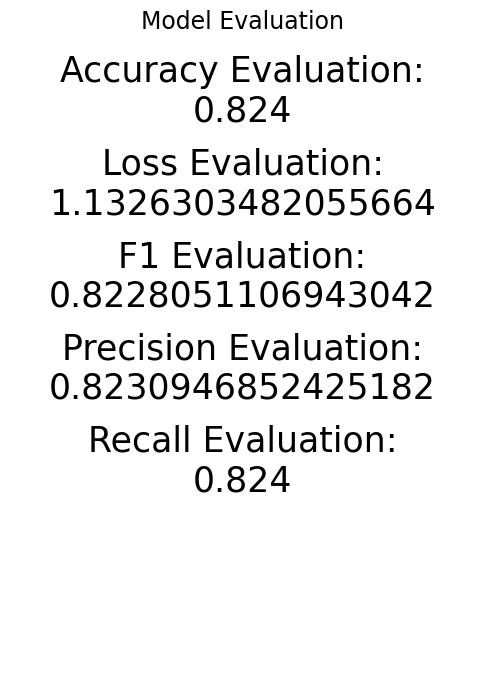

In [ ]:
# Set matplotlib
fig, ax = plt.subplots(figsize=(6, 8))

# Define model evaluation metrics
eval_metrics = []
y_plot = [1, 0.85, 0.7, 0.55, 0.4]
title_plot = ["Accuracy", "Loss", "F1", "Precision", "Recall"]

acc_eval = evaluation_result["eval_accuracy"]
eval_metrics.append(acc_eval)

loss_eval = evaluation_result["eval_loss"]
eval_metrics.append(loss_eval)

f1_eval = evaluation_result["eval_f1"]
eval_metrics.append(f1_eval)

pre_eval = evaluation_result["eval_precision"]
eval_metrics.append(pre_eval)

rec_eval = evaluation_result["eval_recall"]
eval_metrics.append(rec_eval)

# Plot model evaluation metrics
for i in range(5):
    ax.text(0.5, y_plot[i], f"{title_plot[i]} Evaluation:\n{eval_metrics[i]}",
            verticalalignment="top", horizontalalignment="center",
            transform=ax.transAxes,
            color="black", fontsize=25)

plt.title(label="Model Evaluation", fontsize=17, pad=19)
plt.axis("off")

# Save plot in image
plt.savefig(MODEL_EVALUATION_PNG, dpi=300.0, transparent=True)

Next, I will display Confusion Matrix on testing dataset.

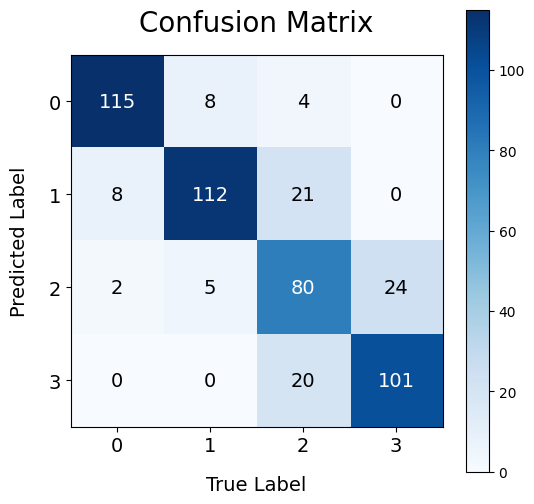

In [ ]:
# Ploting confusion matrix
skplt.metrics.plot_confusion_matrix(y_pred,
                                    y_true,
                                    figsize=(6, 6),
                                    text_fontsize=14,
                                   )

plt.title(label="Confusion Matrix", fontsize=20, pad=17)
plt.ylabel("Predicted Label", labelpad=14)
plt.xlabel("True Label", labelpad=14)

# Save plot in image
plt.savefig(CM_EVALUATION_PNG, dpi=300.0)

Next, I will display Classification Report on testing dataset.

In [ ]:
# Print classification report
print(metrics.classification_report(y_pred, y_true, digits=3))

              precision    recall  f1-score   support

           0      0.920     0.906     0.913       127
           1      0.896     0.794     0.842       141
           2      0.640     0.721     0.678       111
           3      0.808     0.835     0.821       121

    accuracy                          0.816       500
   macro avg      0.816     0.814     0.813       500
weighted avg      0.824     0.816     0.819       500



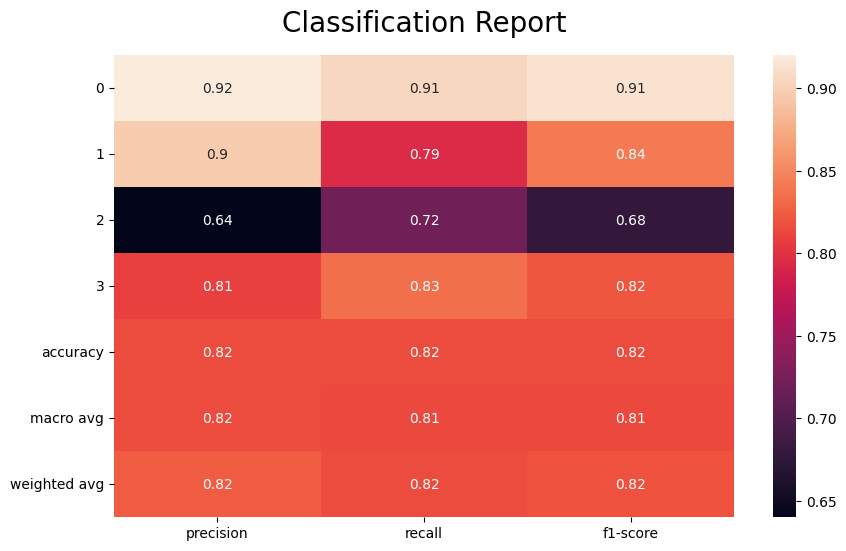

In [ ]:
# Ploting classification report
fig, ax = plt.subplots(figsize=(10, 6))

clf_report = metrics.classification_report(y_pred,
                                           y_true,
                                           output_dict=True)

classification_report = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, ax=ax, annot=True)

classification_report.set_title("Classification Report", fontsize=20, pad=17)
fig = classification_report.get_figure()

# Save plot in image
fig.savefig(CR_EVALUATION_PNG, dpi=300.0)

Last, I will display fine tuning time process.

In [ ]:
# Define timer
def display_timer(start, end):
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    return int(hours), int(minutes), seconds

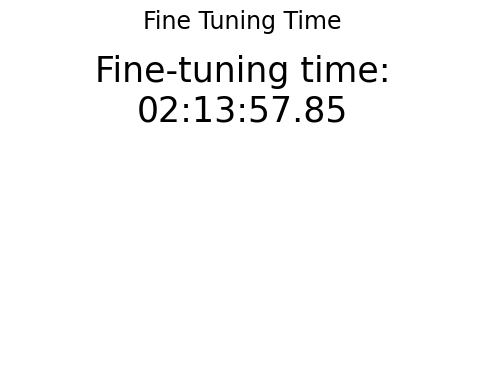

In [ ]:
# Ploting training time
fig, ax = plt.subplots(figsize=(6, 4))

hours_ft, minutes_ft, seconds_ft = display_timer(time_fine_tunning_init, time_fine_tunning_end)

ax.text(0.5, 1, "Fine-tuning time:\n{:0>2}:{:0>2}:{:05.2f}".format(int(hours_ft),int(minutes_ft),seconds_ft),
        verticalalignment="top", horizontalalignment="center",
        transform=ax.transAxes,
        color="black", fontsize=25)

plt.title(label="Fine Tuning Time", fontsize=17, pad=19)
plt.axis("off")

# Save plot in image
plt.savefig(FINE_TUNING_TIME_PNG, dpi=300.0, transparent=True)

In [ ]:
# Save training process
!cp -r {COLAB_BASE_PATH + MODEL_EVALUATION + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + CM_EVALUATION + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + CR_EVALUATION + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + FINE_TUNING_TIME + PNG} {DRIVE_TARGET_PATH}

<div class="markdown-google-sans">

## **Prediction 🥳**
</div>

Great, now the fine tuned model is ready to use. In the final stage, I will do some examples of the prediction process. There are 2 ways to use this fine tuned model.

<div class="markdown-google-sans">

### **Pipeline ✅**
</div>

First ways use [`pipeline`](https://huggingface.co/docs/transformers/main_classes/pipelines) function from [Transformers Hugging Face](https://huggingface.co/docs/transformers/index). To perform audio classification, we will use `audio-classification` parameter.

In [ ]:
# Define timer
def timer(start, end):
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

In [ ]:
# Define path
audio_file_path = "Citeureup 2.wav"

In [ ]:
# Predict
print("Start predict...")
date_time_predict = datetime.datetime.now().strftime("%Y-%m-%d at %H:%M:%S UTC")
print(date_time_predict + "\n")

time_predict_init = time.time()

# Start predict
classifier = pipeline("audio-classification", model=HUGGING_FACE_MODEL)
print(classifier(audio_file_path))

time_predict_end = time.time()
time_predict = time_predict_end - time_predict_init

print("\nEnd Predict...")
date_time_predict_end = datetime.datetime.now().strftime("%Y-%m-%d at %H:%M:%S UTC")
print(date_time_predict_end + "\n")

print("Predict time:")
timer(time_predict_init, time_predict_end)

Start predict...
2023-07-18 at 15:36:51 UTC



Could not load the `decoder` for hafidikhsan/wav2vec2-large-xlsr-53-english-pronunciation-evaluation-ep-v3. Defaulting to raw CTC. Error: No module named 'kenlm'
Try to install `kenlm`: `pip install kenlm
Try to install `pyctcdecode`: `pip install pyctcdecode


[{'score': 0.9183214902877808, 'label': 'advanced'}, {'score': 0.08098124712705612, 'label': 'intermediate'}, {'score': 0.00050165451830253, 'label': 'proficient'}, {'score': 0.000195592874661088, 'label': 'beginner'}]

End Predict...
2023-07-18 at 15:43:27 UTC

Predict time:
00:06:36.03


In [ ]:
# Start predict
print(classifier("/content/drive/MyDrive/Final Project/Machine Learning/Pronounciation/Test Audio/band3.mp3"))

[{'score': 0.9996059536933899, 'label': 'intermediate'}, {'score': 0.00019991249428130686, 'label': 'advanced'}, {'score': 0.00018648790137376636, 'label': 'beginner'}, {'score': 7.651649866602384e-06, 'label': 'proficient'}]


In [ ]:
# Start predict
print(classifier("/content/drive/MyDrive/Final Project/Machine Learning/Pronounciation/Test Audio/band4.mp3"))

[{'score': 0.9984941482543945, 'label': 'intermediate'}, {'score': 0.0014775401214137673, 'label': 'beginner'}, {'score': 2.6092373445862904e-05, 'label': 'advanced'}, {'score': 2.298018216606579e-06, 'label': 'proficient'}]


In [ ]:
# Start predict
print(classifier("/content/drive/MyDrive/Final Project/Machine Learning/Pronounciation/Test Audio/band5.mp3"))

[{'score': 0.9994640946388245, 'label': 'intermediate'}, {'score': 0.0002615863922983408, 'label': 'beginner'}, {'score': 0.0002576986444182694, 'label': 'advanced'}, {'score': 1.6579188013565727e-05, 'label': 'proficient'}]


In [ ]:
# Start predict
print(classifier("/content/drive/MyDrive/Final Project/Machine Learning/Pronounciation/Test Audio/band8.mp3"))

[{'score': 0.9994636178016663, 'label': 'intermediate'}, {'score': 0.0004761509771924466, 'label': 'beginner'}, {'score': 5.6117994972737506e-05, 'label': 'advanced'}, {'score': 4.191017524135532e-06, 'label': 'proficient'}]


<div class="markdown-google-sans">

### **Non Pipeline ❌**
</div>

Second ways is use [`Wav2Vec2ForSequenceClassification`](https://huggingface.co/docs/transformers/model_doc/wav2vec2#transformers.Wav2Vec2ForSequenceClassification) to load model and [`Wav2Vec2FeatureExtractor`](https://huggingface.co/docs/transformers/model_doc/wav2vec2#transformers.Wav2Vec2FeatureExtractor) to load feature extractor from [Wav2Vec2 Transformers Hugging Face](https://huggingface.co/docs/transformers/model_doc/wav2vec2). In this way, use `torchaudio` to load audio to speech array and `torch` to predict.

In [ ]:
# Load model
model_test = Wav2Vec2ForSequenceClassification.from_pretrained(HUGGING_FACE_MODEL)

In [ ]:
# Load feature extractor
feature_extractor_test = Wav2Vec2FeatureExtractor.from_pretrained(HUGGING_FACE_MODEL)

In [ ]:
# Get device info
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Device: {device}")

In [ ]:
# Define path
audio_file_path = "Citeureup 2.wav"

In [ ]:
# Define timer
def timer(start, end):
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

In [ ]:
# Define speech to array function
def speech_file_to_array_fn(path, sampling_rate):
    # Get array data
    speech_array, _sampling_rate = torchaudio.load(path,)

    # Change audio to mono
    waveform_mono = torch.mean(speech_array, dim=0).unsqueeze(0)

    # Resample audio
    resampler = torchaudio.transforms.Resample(sampling_rate)
    speech = resampler(waveform_mono).squeeze().numpy()

    return speech

In [ ]:
# Audio to array
speech = speech_file_to_array_fn(audio_file_path, 16000)

In [ ]:
# Feature extractor data
inputs = feature_extractor_test(speech, sampling_rate=16000, return_tensors="pt")

In [ ]:
# Predict
print("Start predict...")
date_time_predict = datetime.datetime.now().strftime("%Y-%m-%d at %H:%M:%S UTC")
print(date_time_predict + "\n")

time_predict_init = time.time()

# Start predict
with torch.no_grad():
    logits = model_test(**inputs).logits

time_predict_end = time.time()
time_predict = time_predict_end - time_predict_init

print("\nEnd Predict...")
date_time_predict_end = datetime.datetime.now().strftime("%Y-%m-%d at %H:%M:%S UTC")
print(date_time_predict_end + "\n")

print("Predict time:")
timer(time_predict_init, time_predict_end)

In [ ]:
# Predict to label
predicted_class_ids = torch.argmax(logits).item()
predicted_label = model_test.config.id2label[predicted_class_ids]
predicted_label

<div class="markdown-google-sans">

## **Reference 🫡**
</div>

<div class="markdown-google-sans">

### **Dataset ✅**
</div>

1.   [jbpark0614/speechocean762](https://huggingface.co/datasets/jbpark0614/speechocean762)
2.   [hafidikhsan/speechocean762-totalscore-real](https://huggingface.co/datasets/hafidikhsan/speechocean762-totalscore-real)
3.   [hafidikhsan/speechocean762-totalscore-undersampling](https://huggingface.co/datasets/hafidikhsan/speechocean762-totalscore-undersampling)
4.   [hafidikhsan/speechocean762-totalscore-oversampling-augmented](https://huggingface.co/datasets/hafidikhsan/speechocean762-totalscore-oversampling-augmented)
5.   [hafidikhsan/speechocean762-totalscore-oversampling-duplicate](https://huggingface.co/datasets/hafidikhsan/speechocean762-totalscore-oversampling-duplicate)

<div class="markdown-google-sans">

### **Website ✅**
</div>

1.   [Wav2Vec2](https://huggingface.co/docs/transformers/model_doc/wav2vec2)
2.   [Wav2Vec2-Large-XLSR-53-English](https://huggingface.co/jonatasgrosman/wav2vec2-large-xlsr-53-english)
3.   [Audio Classification](https://huggingface.co/docs/transformers/tasks/audio_classification)
4.   [Audio Classification with Hugging Face Transformers](https://keras.io/examples/audio/wav2vec2_audiocls/)

<div class="markdown-google-sans">

### **Code ✅**
</div>

1.   [Fine-Tune XLSR-Wav2Vec2 on Turkish ASR with 🤗 Transformers](https://colab.research.google.com/github/patrickvonplaten/notebooks/blob/master/Fine_Tune_XLSR_Wav2Vec2_on_Turkish_ASR_with_%F0%9F%A4%97_Transformers.ipynb#scrollTo=Xmgrx4bRwLIH)
2.   [Emotion recognition in Greek speech using Wav2Vec2](https://colab.research.google.com/github/m3hrdadfi/soxan/blob/main/notebooks/Emotion_recognition_in_Greek_speech_using_Wav2Vec2.ipynb#scrollTo=LL8I5MKvPnth)
3.   [Audio-Classification-on-Keyword-Spotting](https://colab.research.google.com/github/huggingface/notebooks/blob/main/examples/audio_classification.ipynb#scrollTo=ltokP9mO9pjI)
4.   [audio_classification](https://colab.research.google.com/github/huggingface/notebooks/blob/main/transformers_doc/en/tensorflow/audio_classification.ipynb#scrollTo=KG05k06Ol0fT)
5.   [Fine-Tune Wav2Vec2 for English ASR Notebook](https://colab.research.google.com/drive/1FjTsqbYKphl9kL-eILgUc-bl4zVThL8F?usp=sharing#scrollTo=BeBosnY9BH3e)